In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import pylab

def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output



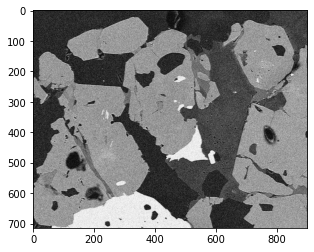

In [3]:
img = io.imread('/Users/rsingh/Downloads/BSE_Google_noisy.jpg')    # Load the image
#img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
plt.imshow(img,cmap=plt.cm.gray)

In [4]:
import scipy.signal

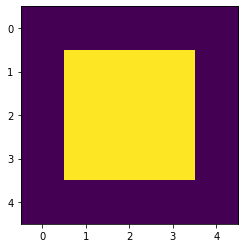

In [5]:
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
kernel_ = np.zeros((5,5))
kernel_[1:-1,1:-1] = kernel
plt.imshow(kernel_)

In [6]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

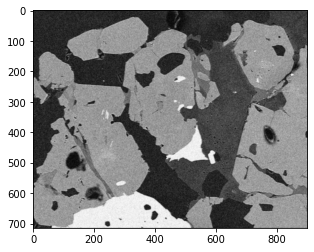

In [7]:
avg1 = convolve2d(img, kernel)
plt.imshow(avg1,cmap=plt.cm.gray)

In [8]:
avg1.dtype

dtype('uint8')

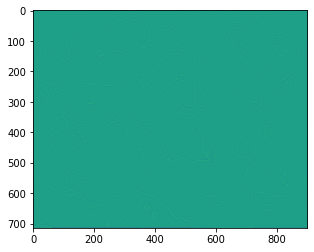

In [9]:
plt.imshow(avg1.astype('int')-img.astype('int'))

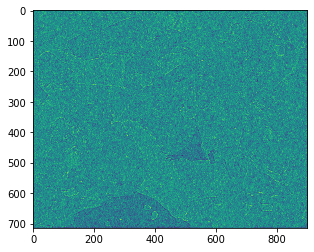

In [10]:
m = np.zeros_like(img)
m[avg1.astype('int')-img.astype('int')>0] = 1
plt.imshow(m)

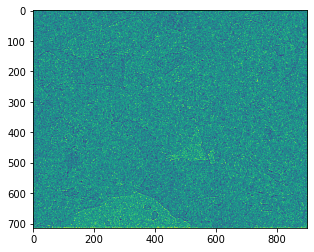

In [11]:
m = np.zeros_like(img)
m[avg1.astype('int')-img.astype('int')<0] = 1
plt.imshow(m)

In [12]:
kernel = np.array([[1,2,1],[2,3,2],[1,2,1]])
kernel = kernel/np.sum(kernel)

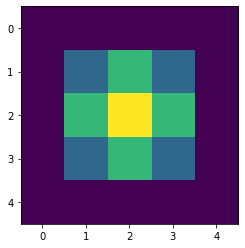

In [13]:
kernel_ = np.zeros((5,5))
kernel_[1:-1,1:-1] = kernel
plt.imshow(kernel_)

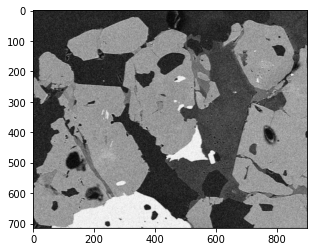

In [13]:
avg2 = convolve2d(img, kernel)
plt.imshow(avg2,cmap=plt.cm.gray)

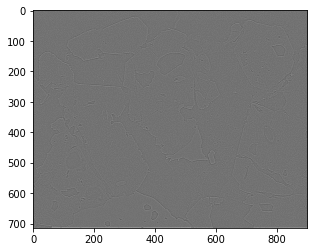

In [14]:
plt.imshow(avg2.astype('int')-avg1.astype('int'),cmap=plt.cm.gray)

In [15]:
kernel.reshape(-1)

array([0.06666667, 0.13333333, 0.06666667, 0.13333333, 0.2       ,
       0.13333333, 0.06666667, 0.13333333, 0.06666667])

In [16]:
gaussian = lambda r2, sigma: np.exp( -0.5*r2/sigma**2 )
w = np.zeros((3,1))
for i in range(3):
    w[i] = gaussian(np.abs(i-1),0.5)
print(w.T)
GaussianW = w*w.T
GaussianW = GaussianW/np.sum(GaussianW)
print(GaussianW)

[[0.13533528 1.         0.13533528]]
[[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]]


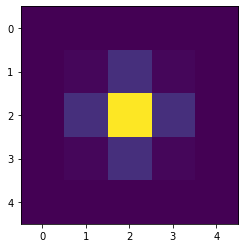

In [17]:
kernel_ = np.zeros((5,5))
kernel_[1:-1,1:-1] = GaussianW
plt.imshow(kernel_)

In [18]:
np.sum(GaussianW)

1.0

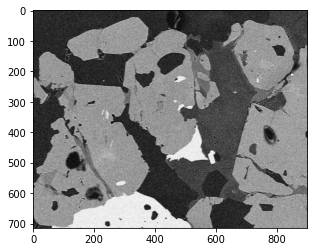

In [19]:
avg3 = convolve2d(img, GaussianW)
plt.imshow(avg3,cmap= plt.cm.gray)

In [20]:
import cv2

In [21]:
help(cv2.GaussianBlur)

Help on built-in function GaussianBlur:

GaussianBlur(...)
    GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
    .   @brief Blurs an image using a Gaussian filter.
    .   
    .   The function convolves the source image with the specified Gaussian kernel. In-place filtering is
    .   supported.
    .   
    .   @param src input image; the image can have any number of channels, which are processed
    .   independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
    .   @param dst output image of the same size and type as src.
    .   @param ksize Gaussian kernel size. ksize.width and ksize.height can differ but they both must be
    .   positive and odd. Or, they can be zero's and then they are computed from sigma.
    .   @param sigmaX Gaussian kernel standard deviation in X direction.
    .   @param sigmaY Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be
    .   equal to sigmaX, if both sigmas are z

In [22]:
avg4 = cv2.GaussianBlur(img,(3,3),0)

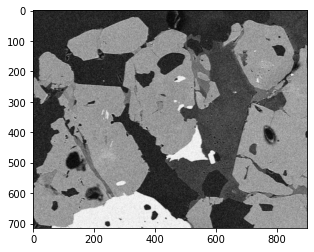

In [23]:
plt.imshow(avg4,cmap=plt.cm.gray)

In [25]:
np.mean(np.abs(avg3.astype('int')-avg4.astype('int')))

7.889525177440565

In [26]:
help(cv2.getGaussianKernel)

Help on built-in function getGaussianKernel:

getGaussianKernel(...)
    getGaussianKernel(ksize, sigma[, ktype]) -> retval
    .   @brief Returns Gaussian filter coefficients.
    .   
    .   The function computes and returns the \f$\texttt{ksize} \times 1\f$ matrix of Gaussian filter
    .   coefficients:
    .   
    .   \f[G_i= \alpha *e^{-(i-( \texttt{ksize} -1)/2)^2/(2* \texttt{sigma}^2)},\f]
    .   
    .   where \f$i=0..\texttt{ksize}-1\f$ and \f$\alpha\f$ is the scale factor chosen so that \f$\sum_i G_i=1\f$.
    .   
    .   Two of such generated kernels can be passed to sepFilter2D. Those functions automatically recognize
    .   smoothing kernels (a symmetrical kernel with sum of weights equal to 1) and handle them accordingly.
    .   You may also use the higher-level GaussianBlur.
    .   @param ksize Aperture size. It should be odd ( \f$\texttt{ksize} \mod 2 = 1\f$ ) and positive.
    .   @param sigma Gaussian standard deviation. If it is non-positive, it is computed f

In [27]:
G = cv2.getGaussianKernel(3,0)
G*G.T

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [28]:
sigma = 0.3*((3-1)/2-1)+0.8
sigma

0.8

In [29]:
Gw = G*G.T

In [30]:
avg5 = convolve2d(img, Gw)

In [31]:
np.mean(np.abs(avg5.astype('int')-avg4.astype('int')))

0.629114242811442

In [32]:
avg4 = cv2.GaussianBlur(img,(101,101),0)

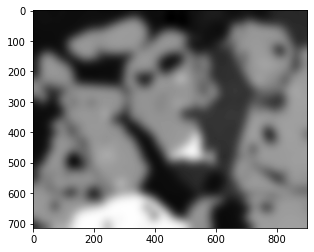

In [33]:
plt.imshow(avg4,cmap=plt.cm.gray)

In [34]:
avg4 = cv2.GaussianBlur(img,(0,0),20)

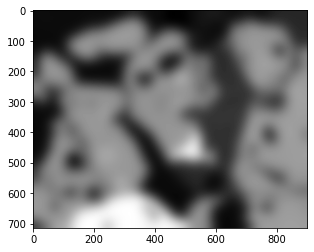

In [35]:
plt.imshow(avg4,cmap=plt.cm.gray)

In [36]:
#Sharpening filter

In [42]:
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9

In [37]:
kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

In [38]:
np.sum(kernel)

1

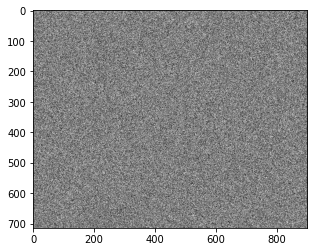

In [39]:
diff = convolve2d(img, kernel)
plt.imshow(diff,cmap=plt.cm.gray)

In [40]:
diff.dtype

dtype('uint8')

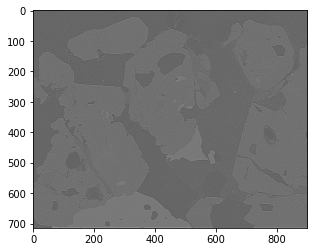

In [41]:
diff = convolve2d(img.astype('int32'), kernel)
plt.imshow(diff,cmap=plt.cm.gray)

In [42]:
diff.dtype

dtype('int32')

In [43]:
print(np.min(diff),np.max(diff))

-1031 1640


In [44]:
print(np.min(avg1),np.max(avg1))

4 250


In [45]:
d = diff-np.min(diff)
d = d/np.max(d)

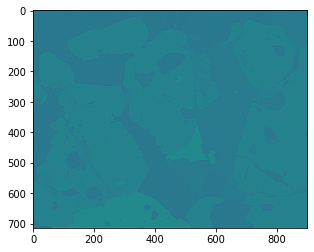

In [46]:
plt.imshow(d)

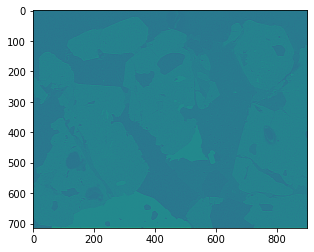

In [47]:
plt.imshow((d*255).astype('uint8'))

In [48]:
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9

In [49]:
avg1 = convolve2d(img, kernel)

In [50]:
diff2 = img.astype('int')-avg1.astype('int')

In [51]:
print(np.min(diff2),np.max(diff2))

-118 155


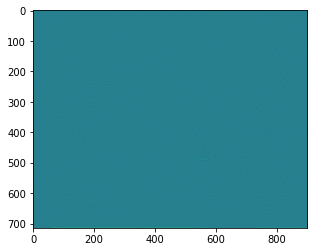

In [52]:
plt.imshow(diff2)

In [53]:
print(np.min(9*diff2),np.max(9*diff2))

-1062 1395


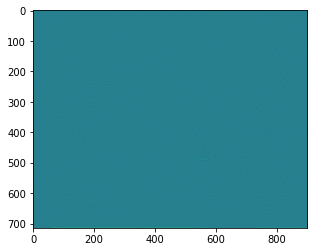

In [54]:
plt.imshow(9*diff2)

In [61]:
kernel = [[-1,1]]

In [153]:
hEdge = scipy.signal.convolve2d(img,kernel,'same')

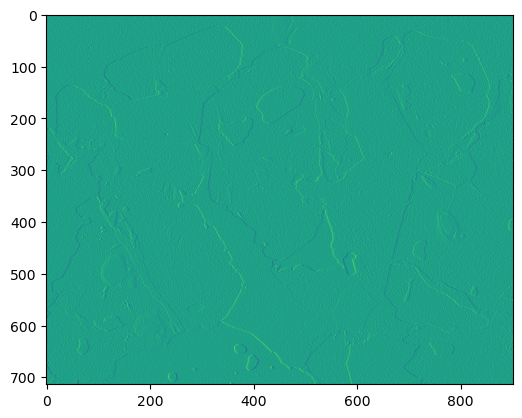

In [154]:

plt.imshow(hEdge)

In [155]:
kernel = np.asarray(kernel)
vEdge = scipy.signal.convolve2d(img,kernel.T,'same')

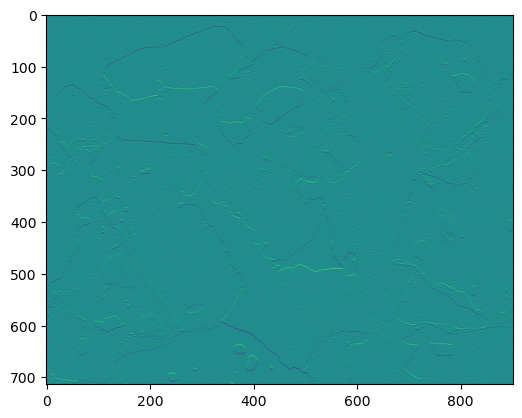

In [156]:
plt.imshow(vEdge)

In [161]:
m = np.zeros_like(img)

m[np.abs(hEdge)>100] = 1

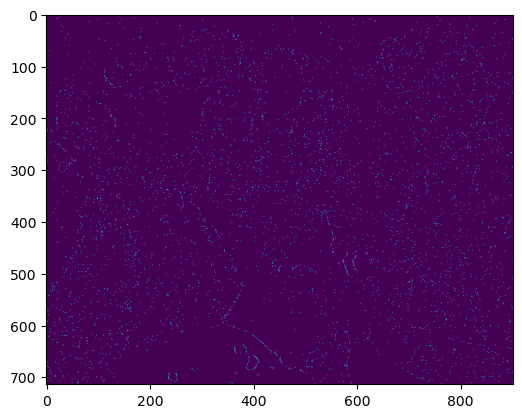

In [162]:
plt.imshow(m)

In [163]:
m = np.zeros_like(img)

m[np.abs(vEdge)>100] = 1

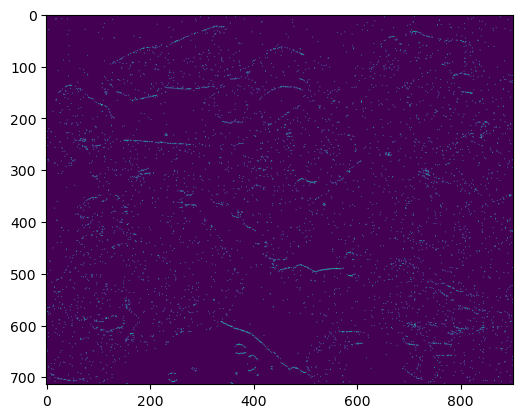

In [164]:
plt.imshow(m)

In [182]:
a = np.c_[np.ones((100,1)).T, np.zeros((200,1)).T]

In [183]:
np.diff(a)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

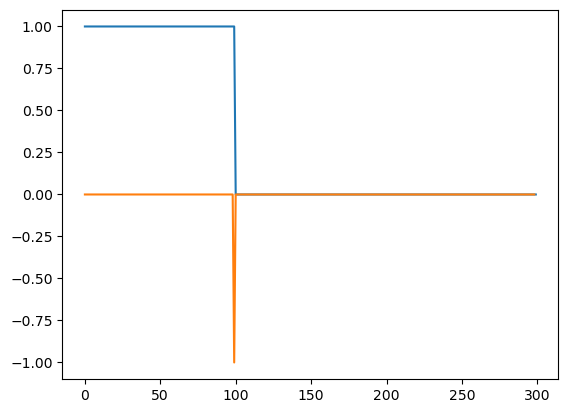

In [184]:
_=plt.plot(a.T)
_=plt.plot(np.diff(a).T)

In [185]:
a= a+np.random.rand(1,300)

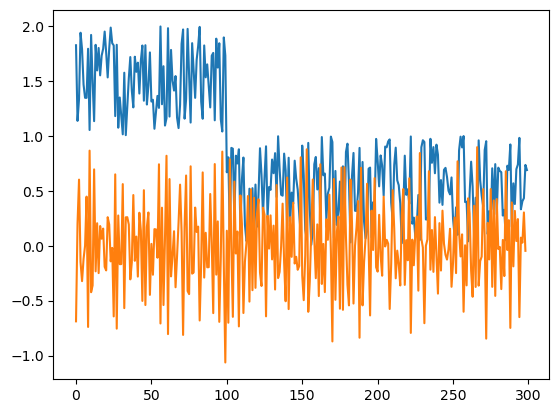

In [186]:
_=plt.plot(a.T)
_=plt.plot(np.diff(a).T)